## Learning a function from a formula

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.463717 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.62e-01]    [2.24e-01]    [1.04e+00]    
1000      [1.42e-04]    [1.63e-04]    [2.79e-02]    
2000      [1.47e-05]    [3.65e-05]    [1.32e-02]    
3000      [1.81e-06]    [1.94e-05]    [9.64e-03]    
4000      [2.84e-06]    [1.61e-05]    [8.78e-03]    
5000      [4.07e-07]    [1.40e-05]    [8.19e-03]    
6000      [2.01e-06]    [1.39e-05]    [8.16e-03]    
7000      [2.19e-06]    [1.53e-05]    [8.56e-03]    
8000      [1.44e-06]    [1.52e-05]    [8.54e-03]    
9000      [2.99e-08]    [1.24e-05]    [7.71e-03]    
10000     [1.26e-07]    [1.23e-05]    [7.66e-03]    

Best model at step 9000:
  train loss: 2.99e-08
  test loss: 1.24e-05
  test metric: [7.71e-03]

'train' took 2.581398 s

Saving loss history to /Users/imriaharoni/Library/CloudStorage/GoogleDrive-imri.aharoni@gmail.com/האחסון שלי/Office/DSRC/Courses and Workshops/PINN_Workshop/PINN_Workshop_Code/

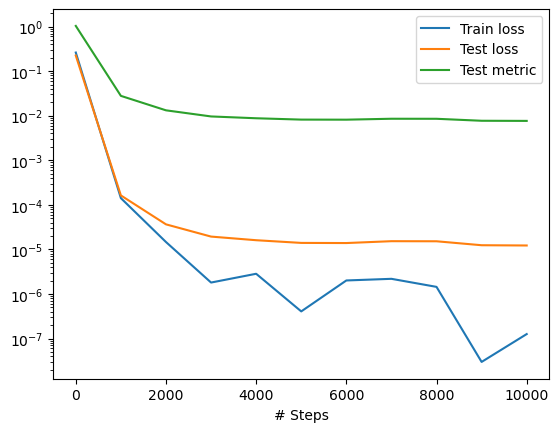

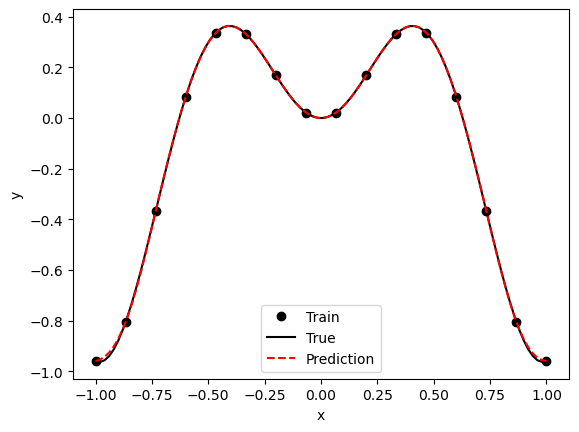

In [1]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import deepxde as dde
import numpy as np


def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)


geom = dde.geometry.Interval(-1, 1)
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

## Learning a function from a dataset
We will learn a function from a dataset. The dataset used to train the model can be found here, and the dataset used to test the model can be found here.

#### The next step is to import the dataset needed for the model training
The variables fname_train and fname_test are used to import the dataset and recall the dataset later in the code.

In [11]:
fname_train = "../Data_sets/learn_func_train"
fname_test = "../Data_sets/learn_func_test"

#### Defining the dataset- 
The next step is to define data files names and standardize it in an appropriate form

In [12]:
data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

#### Defining the model specifics- 
The first line defines the layout of the network size used to train the model. The next line specifies the activation function used tanh and the initializer as Glorot uniform.

In [14]:
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

#### Build the model- using adam as an optimizer with a learning rate of 0.001. The model is trained with 50000 iterations:

In [15]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)

Compiling model...
'compile' took 0.000208 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.74e-01]    [3.89e-01]    [8.73e-01]    
1000      [7.22e-03]    [7.34e-03]    [1.20e-01]    
2000      [5.71e-03]    [6.08e-03]    [1.09e-01]    
3000      [5.23e-03]    [5.65e-03]    [1.05e-01]    
4000      [4.93e-03]    [5.43e-03]    [1.03e-01]    
5000      [5.11e-03]    [5.48e-03]    [1.04e-01]    
6000      [4.77e-03]    [5.27e-03]    [1.02e-01]    
7000      [5.70e-03]    [5.94e-03]    [1.08e-01]    
8000      [4.75e-03]    [5.30e-03]    [1.02e-01]    
9000      [4.74e-03]    [5.32e-03]    [1.02e-01]    
10000     [4.74e-03]    [5.34e-03]    [1.02e-01]    
11000     [4.76e-03]    [5.39e-03]    [1.03e-01]    
12000     [4.72e-03]    [5.31e-03]    [1.02e-01]    
13000     [4.72e-03]    [5.27e-03]    [1.02e-01]    
14000     [4.74e-03]    [5.26e-03]    [1.02e-01]    
15000     [4.71e-03]    [5.25e-03]    [1.01e-01]    
16000     [4.71e-03]    [5.26e-03]

#### Save and plot the best trained model

Saving loss history to /Users/imriaharoni/Library/CloudStorage/GoogleDrive-imri.aharoni@gmail.com/האחסון שלי/Office/DSRC/Courses and Workshops/PINN_Workshop/PINN_Workshop_Code/DeppXDE/loss.dat ...
Saving training data to /Users/imriaharoni/Library/CloudStorage/GoogleDrive-imri.aharoni@gmail.com/האחסון שלי/Office/DSRC/Courses and Workshops/PINN_Workshop/PINN_Workshop_Code/DeppXDE/train.dat ...
Saving test data to /Users/imriaharoni/Library/CloudStorage/GoogleDrive-imri.aharoni@gmail.com/האחסון שלי/Office/DSRC/Courses and Workshops/PINN_Workshop/PINN_Workshop_Code/DeppXDE/test.dat ...


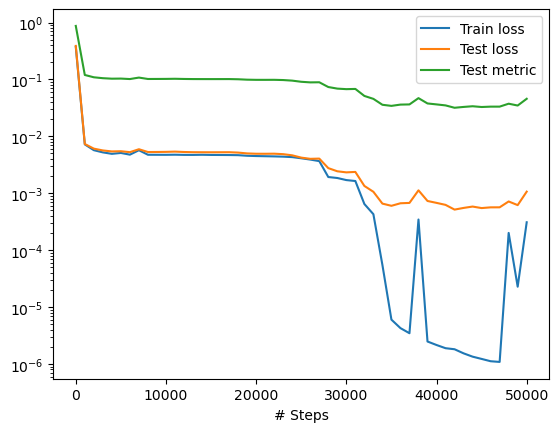

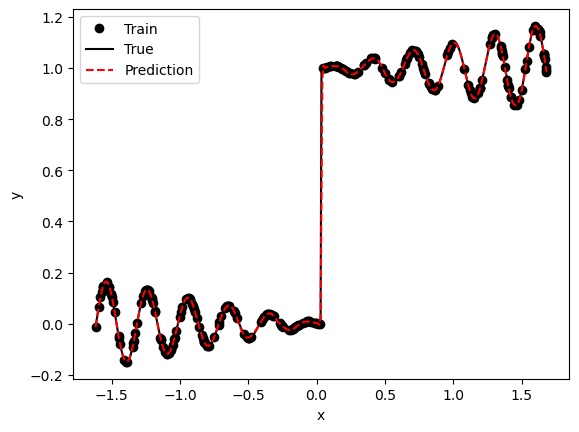

In [16]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Forward Problems

## 1D Heat equation

 
where 
 is the thermal diffusivity constant.

With Dirichlet boundary conditions:

and periodic(sinusoidal) inital condition:

 
where 
 is the length of the bar, 
 is the frequency of the sinusoidal initial conditions.

The exact solution is 
 
 
.